# Name : Mohammad Sabik Irbaz
# Student ID : 160041004
# Course : CSE 4836 - Pattern Recognition Lab
# Lab : 03
# Task : 01
# Topic : Basic Classification: Classify Images of Clothing

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Fetch data
train_data = datasets.FashionMNIST('data',train=True,download=True,transform=transforms.ToTensor())
test_data = datasets.FashionMNIST('data',train=False,download=True,transform=transforms.ToTensor())

# Data Visualization

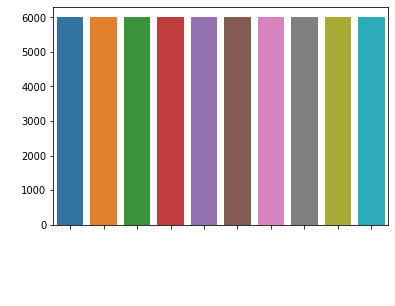

In [ ]:
# Train Data Distribution
import seaborn as sns
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels = list()
for i in range(len(train_data)) : labels.append(train_data[i][1])
labels = torch.tensor(labels)
cnt = torch.bincount(labels).numpy()
ax = sns.barplot(x = class_names, y = cnt)
ax.set_xlabel('Type of Clothing',color="white")
ax.set_ylabel('Train Data Distribution',color="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,color="white");

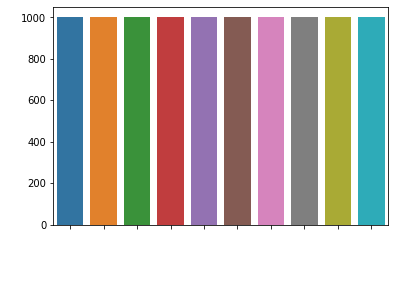

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels = list()
for i in range(len(test_data)) : labels.append(test_data[i][1])
labels = torch.tensor(labels)
cnt = torch.bincount(labels).numpy()
ax = sns.barplot(x = class_names, y = cnt)
ax.set_xlabel('Type of Clothing',color="white")
ax.set_ylabel('Test Data Distribution',color="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,color="white");

#Train - Test load

In [ ]:
train_loader = DataLoader(train_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# Model Architecture

1 extra layer added and the number of nodes are also changed <br/>
It drastically improved the results of the model

In [ ]:
class FashionMNISTClassifer(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(28 * 28, 128)
    self.l2 = nn.Linear(128,256)
    self.l3 = nn.Linear(256,10)
  
  def forward(self, x):
    h1 = nn.functional.relu(self.l1(x))
    h2 = nn.functional.relu(self.l2(h1))
    logits = self.l3(h2)
    return logits

model = FashionMNISTClassifer().cuda()

Adam optimizer with 1e-2 learning rate is used

In [ ]:
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

Here I used pytorch cross entropy loss which also adds the extra softmax layer by default.

In [ ]:
loss = nn.CrossEntropyLoss()

# Training and testing the model

In [ ]:
nb_epochs = 100

epoch_list=[10,30,50,100]
train_acc=list()
test_acc=list()

for epoch in range(nb_epochs):
  losses = list()
  model.train()
  accuracies = list()
  for batch in train_loader:
    x,y = batch
    b = x.size(0)
    x = x.view(b,-1).cuda()
    
    # Forward propagation
    logit = model(x)

    # Computing Loss
    J = loss(logit,y.cuda())

    # Cleaning the gradient
    model.zero_grad()
    
    # Accumulating the partial derivatives of J wrt params
    J.backward()
    
    # Step in the opposite direction of the gradient
    optimizer.step()

    losses.append(J.item())
    accuracies.append(y.eq(logit.detach().argmax(dim=1).cpu()).float().mean())

  print(f'Epoch {epoch+1}',end=', ' )
  print(f'train loss: {torch.tensor(losses).mean():.2f}',end=', ')
  print(f'train accuracy: {torch.tensor(accuracies).mean():.2f}')


  if epoch+1 in epoch_list : 
    acc = torch.tensor(accuracies).mean()
    train_acc.append(acc.numpy())
  
  # Evaluation

  losses = list()
  accuracies = list()
  model.eval()
  for batch in test_loader:
    x,y = batch
    b = x.size(0)
    x = x.view(b,-1).cuda()
    
    # Forward prop to calculate loss
    with torch.no_grad():
      logit = model(x)
    
    # Computing Loss
    J = loss(logit,y.cuda())

    losses.append(J.item())
    accuracies.append(y.eq(logit.detach().argmax(dim=1).cpu()).float().mean())
  print(f'Epoch {epoch+1}',end=', ' )
  print(f'test loss: {torch.tensor(losses).mean():.2f}',end=', ')
  print(f'test accuracy: {torch.tensor(accuracies).mean():.2f}')

  if epoch+1 in epoch_list : 
    acc = torch.tensor(accuracies).mean()
    test_acc.append(acc.numpy())

Epoch 1, train loss: 0.50, train accuracy: 0.82
Epoch 1, test loss: 0.43, test accuracy: 0.84
Epoch 2, train loss: 0.37, train accuracy: 0.86
Epoch 2, test loss: 0.40, test accuracy: 0.85
Epoch 3, train loss: 0.33, train accuracy: 0.88
Epoch 3, test loss: 0.36, test accuracy: 0.87
Epoch 4, train loss: 0.30, train accuracy: 0.89
Epoch 4, test loss: 0.36, test accuracy: 0.87
Epoch 5, train loss: 0.28, train accuracy: 0.89
Epoch 5, test loss: 0.36, test accuracy: 0.87
Epoch 6, train loss: 0.27, train accuracy: 0.90
Epoch 6, test loss: 0.36, test accuracy: 0.87
Epoch 7, train loss: 0.25, train accuracy: 0.90
Epoch 7, test loss: 0.36, test accuracy: 0.88
Epoch 8, train loss: 0.24, train accuracy: 0.91
Epoch 8, test loss: 0.39, test accuracy: 0.87
Epoch 9, train loss: 0.23, train accuracy: 0.91
Epoch 9, test loss: 0.39, test accuracy: 0.87
Epoch 10, train loss: 0.22, train accuracy: 0.92
Epoch 10, test loss: 0.41, test accuracy: 0.87
Epoch 11, train loss: 0.21, train accuracy: 0.92
Epoch 11,

In [ ]:
# Train and test accuracy of each epoch
'''
Epoch 1, train loss: 0.50, train accuracy: 0.82
Epoch 1, test loss: 0.43, test accuracy: 0.84
Epoch 2, train loss: 0.37, train accuracy: 0.86
Epoch 2, test loss: 0.40, test accuracy: 0.86
Epoch 3, train loss: 0.33, train accuracy: 0.88
Epoch 3, test loss: 0.37, test accuracy: 0.87
Epoch 4, train loss: 0.30, train accuracy: 0.89
Epoch 4, test loss: 0.35, test accuracy: 0.87
Epoch 5, train loss: 0.28, train accuracy: 0.89
Epoch 5, test loss: 0.34, test accuracy: 0.88
Epoch 6, train loss: 0.26, train accuracy: 0.90
Epoch 6, test loss: 0.34, test accuracy: 0.88
Epoch 7, train loss: 0.25, train accuracy: 0.91
Epoch 7, test loss: 0.34, test accuracy: 0.88
Epoch 8, train loss: 0.24, train accuracy: 0.91
Epoch 8, test loss: 0.36, test accuracy: 0.88
Epoch 9, train loss: 0.22, train accuracy: 0.91
Epoch 9, test loss: 0.38, test accuracy: 0.88
Epoch 10, train loss: 0.21, train accuracy: 0.92
Epoch 10, test loss: 0.36, test accuracy: 0.88
Epoch 11, train loss: 0.20, train accuracy: 0.92
Epoch 11, test loss: 0.36, test accuracy: 0.88
Epoch 12, train loss: 0.20, train accuracy: 0.92
Epoch 12, test loss: 0.39, test accuracy: 0.88
Epoch 13, train loss: 0.19, train accuracy: 0.93
Epoch 13, test loss: 0.40, test accuracy: 0.88
Epoch 14, train loss: 0.18, train accuracy: 0.93
Epoch 14, test loss: 0.42, test accuracy: 0.88
Epoch 15, train loss: 0.17, train accuracy: 0.93
Epoch 15, test loss: 0.40, test accuracy: 0.88
Epoch 16, train loss: 0.17, train accuracy: 0.94
Epoch 16, test loss: 0.45, test accuracy: 0.88
Epoch 17, train loss: 0.16, train accuracy: 0.94
Epoch 17, test loss: 0.44, test accuracy: 0.88
Epoch 18, train loss: 0.16, train accuracy: 0.94
Epoch 18, test loss: 0.44, test accuracy: 0.88
Epoch 19, train loss: 0.15, train accuracy: 0.94
Epoch 19, test loss: 0.46, test accuracy: 0.88
Epoch 20, train loss: 0.14, train accuracy: 0.94
Epoch 20, test loss: 0.50, test accuracy: 0.87
Epoch 21, train loss: 0.14, train accuracy: 0.94
Epoch 21, test loss: 0.47, test accuracy: 0.88
Epoch 22, train loss: 0.14, train accuracy: 0.95
Epoch 22, test loss: 0.51, test accuracy: 0.87
Epoch 23, train loss: 0.13, train accuracy: 0.95
Epoch 23, test loss: 0.54, test accuracy: 0.86
Epoch 24, train loss: 0.13, train accuracy: 0.95
Epoch 24, test loss: 0.51, test accuracy: 0.87
Epoch 25, train loss: 0.13, train accuracy: 0.95
Epoch 25, test loss: 0.51, test accuracy: 0.87
Epoch 26, train loss: 0.13, train accuracy: 0.95
Epoch 26, test loss: 0.51, test accuracy: 0.87
Epoch 27, train loss: 0.12, train accuracy: 0.95
Epoch 27, test loss: 0.52, test accuracy: 0.86
Epoch 28, train loss: 0.12, train accuracy: 0.95
Epoch 28, test loss: 0.56, test accuracy: 0.87
Epoch 29, train loss: 0.11, train accuracy: 0.96
Epoch 29, test loss: 0.54, test accuracy: 0.87
Epoch 30, train loss: 0.12, train accuracy: 0.95
Epoch 30, test loss: 0.59, test accuracy: 0.87
Epoch 31, train loss: 0.11, train accuracy: 0.96
Epoch 31, test loss: 0.60, test accuracy: 0.87
Epoch 32, train loss: 0.11, train accuracy: 0.96
Epoch 32, test loss: 0.60, test accuracy: 0.87
Epoch 33, train loss: 0.11, train accuracy: 0.96
Epoch 33, test loss: 0.62, test accuracy: 0.87
Epoch 34, train loss: 0.10, train accuracy: 0.96
Epoch 34, test loss: 0.61, test accuracy: 0.87
Epoch 35, train loss: 0.10, train accuracy: 0.96
Epoch 35, test loss: 0.60, test accuracy: 0.87
Epoch 36, train loss: 0.10, train accuracy: 0.96
Epoch 36, test loss: 0.65, test accuracy: 0.87
Epoch 37, train loss: 0.10, train accuracy: 0.96
Epoch 37, test loss: 0.65, test accuracy: 0.86
Epoch 38, train loss: 0.10, train accuracy: 0.96
Epoch 38, test loss: 0.71, test accuracy: 0.87
Epoch 39, train loss: 0.10, train accuracy: 0.96
Epoch 39, test loss: 0.68, test accuracy: 0.87
Epoch 40, train loss: 0.09, train accuracy: 0.97
Epoch 40, test loss: 0.67, test accuracy: 0.87
Epoch 41, train loss: 0.09, train accuracy: 0.96
Epoch 41, test loss: 0.69, test accuracy: 0.87
Epoch 42, train loss: 0.09, train accuracy: 0.96
Epoch 42, test loss: 0.71, test accuracy: 0.87
Epoch 43, train loss: 0.09, train accuracy: 0.96
Epoch 43, test loss: 0.76, test accuracy: 0.87
Epoch 44, train loss: 0.09, train accuracy: 0.97
Epoch 44, test loss: 0.77, test accuracy: 0.87
Epoch 45, train loss: 0.08, train accuracy: 0.97
Epoch 45, test loss: 0.77, test accuracy: 0.87
Epoch 46, train loss: 0.09, train accuracy: 0.97
Epoch 46, test loss: 0.78, test accuracy: 0.87
Epoch 47, train loss: 0.08, train accuracy: 0.97
Epoch 47, test loss: 0.82, test accuracy: 0.88
Epoch 48, train loss: 0.09, train accuracy: 0.97
Epoch 48, test loss: 0.71, test accuracy: 0.87
Epoch 49, train loss: 0.08, train accuracy: 0.97
Epoch 49, test loss: 0.77, test accuracy: 0.87
Epoch 50, train loss: 0.08, train accuracy: 0.97
Epoch 50, test loss: 0.82, test accuracy: 0.87
Epoch 51, train loss: 0.08, train accuracy: 0.97
Epoch 51, test loss: 0.81, test accuracy: 0.88
Epoch 52, train loss: 0.08, train accuracy: 0.97
Epoch 52, test loss: 0.81, test accuracy: 0.88
Epoch 53, train loss: 0.08, train accuracy: 0.97
Epoch 53, test loss: 0.83, test accuracy: 0.88
Epoch 54, train loss: 0.08, train accuracy: 0.97
Epoch 54, test loss: 0.86, test accuracy: 0.87
Epoch 55, train loss: 0.08, train accuracy: 0.97
Epoch 55, test loss: 0.81, test accuracy: 0.88
Epoch 56, train loss: 0.07, train accuracy: 0.97
Epoch 56, test loss: 0.87, test accuracy: 0.88
Epoch 57, train loss: 0.07, train accuracy: 0.97
Epoch 57, test loss: 0.84, test accuracy: 0.87
Epoch 58, train loss: 0.08, train accuracy: 0.97
Epoch 58, test loss: 0.83, test accuracy: 0.87
Epoch 59, train loss: 0.07, train accuracy: 0.97
Epoch 59, test loss: 0.89, test accuracy: 0.87
Epoch 60, train loss: 0.07, train accuracy: 0.97
Epoch 60, test loss: 0.86, test accuracy: 0.88
Epoch 61, train loss: 0.07, train accuracy: 0.97
Epoch 61, test loss: 0.99, test accuracy: 0.88
Epoch 62, train loss: 0.07, train accuracy: 0.97
Epoch 62, test loss: 0.91, test accuracy: 0.88
Epoch 63, train loss: 0.07, train accuracy: 0.97
Epoch 63, test loss: 0.97, test accuracy: 0.88
Epoch 64, train loss: 0.07, train accuracy: 0.97
Epoch 64, test loss: 0.91, test accuracy: 0.88
Epoch 65, train loss: 0.07, train accuracy: 0.97
Epoch 65, test loss: 0.96, test accuracy: 0.88
Epoch 66, train loss: 0.06, train accuracy: 0.98
Epoch 66, test loss: 1.00, test accuracy: 0.88
Epoch 67, train loss: 0.07, train accuracy: 0.97
Epoch 67, test loss: 0.99, test accuracy: 0.88
Epoch 68, train loss: 0.07, train accuracy: 0.98
Epoch 68, test loss: 1.05, test accuracy: 0.88
Epoch 69, train loss: 0.07, train accuracy: 0.98
Epoch 69, test loss: 1.04, test accuracy: 0.88
Epoch 70, train loss: 0.07, train accuracy: 0.98
Epoch 70, test loss: 1.06, test accuracy: 0.88
Epoch 71, train loss: 0.07, train accuracy: 0.97
Epoch 71, test loss: 1.00, test accuracy: 0.88
Epoch 72, train loss: 0.06, train accuracy: 0.98
Epoch 72, test loss: 1.05, test accuracy: 0.88
Epoch 73, train loss: 0.07, train accuracy: 0.98
Epoch 73, test loss: 1.03, test accuracy: 0.88
Epoch 74, train loss: 0.06, train accuracy: 0.98
Epoch 74, test loss: 1.03, test accuracy: 0.88
Epoch 75, train loss: 0.06, train accuracy: 0.98
Epoch 75, test loss: 1.09, test accuracy: 0.88
Epoch 76, train loss: 0.07, train accuracy: 0.98
Epoch 76, test loss: 1.09, test accuracy: 0.88
Epoch 77, train loss: 0.06, train accuracy: 0.98
Epoch 77, test loss: 0.98, test accuracy: 0.88
Epoch 78, train loss: 0.06, train accuracy: 0.98
Epoch 78, test loss: 1.04, test accuracy: 0.87
Epoch 79, train loss: 0.06, train accuracy: 0.98
Epoch 79, test loss: 1.12, test accuracy: 0.87
Epoch 80, train loss: 0.06, train accuracy: 0.98
Epoch 80, test loss: 1.25, test accuracy: 0.88
Epoch 81, train loss: 0.06, train accuracy: 0.98
Epoch 81, test loss: 1.19, test accuracy: 0.87
Epoch 82, train loss: 0.06, train accuracy: 0.98
Epoch 82, test loss: 1.13, test accuracy: 0.88
Epoch 83, train loss: 0.06, train accuracy: 0.98
Epoch 83, test loss: 1.16, test accuracy: 0.88
Epoch 84, train loss: 0.06, train accuracy: 0.98
Epoch 84, test loss: 1.26, test accuracy: 0.88
Epoch 85, train loss: 0.06, train accuracy: 0.98
Epoch 85, test loss: 1.18, test accuracy: 0.88
Epoch 86, train loss: 0.06, train accuracy: 0.98
Epoch 86, test loss: 1.12, test accuracy: 0.88
Epoch 87, train loss: 0.06, train accuracy: 0.98
Epoch 87, test loss: 1.25, test accuracy: 0.88
Epoch 88, train loss: 0.06, train accuracy: 0.98
Epoch 88, test loss: 1.23, test accuracy: 0.88
Epoch 89, train loss: 0.06, train accuracy: 0.98
Epoch 89, test loss: 1.20, test accuracy: 0.88
Epoch 90, train loss: 0.06, train accuracy: 0.98
Epoch 90, test loss: 1.19, test accuracy: 0.88
Epoch 91, train loss: 0.06, train accuracy: 0.98
Epoch 91, test loss: 1.31, test accuracy: 0.88
Epoch 92, train loss: 0.05, train accuracy: 0.98
Epoch 92, test loss: 1.21, test accuracy: 0.88
Epoch 93, train loss: 0.06, train accuracy: 0.98
Epoch 93, test loss: 1.17, test accuracy: 0.88
Epoch 94, train loss: 0.06, train accuracy: 0.98
Epoch 94, test loss: 1.22, test accuracy: 0.88
Epoch 95, train loss: 0.06, train accuracy: 0.98
Epoch 95, test loss: 1.23, test accuracy: 0.88
Epoch 96, train loss: 0.05, train accuracy: 0.98
Epoch 96, test loss: 1.22, test accuracy: 0.88
Epoch 97, train loss: 0.06, train accuracy: 0.98
Epoch 97, test loss: 1.21, test accuracy: 0.88
Epoch 98, train loss: 0.05, train accuracy: 0.98
Epoch 98, test loss: 1.18, test accuracy: 0.88
Epoch 99, train loss: 0.06, train accuracy: 0.98
Epoch 99, test loss: 1.23, test accuracy: 0.88
Epoch 100, train loss: 0.05, train accuracy: 0.98
Epoch 100, test loss: 1.24, test accuracy: 0.88

SyntaxError: ignored

In [ ]:
train_acc,test_acc

([array(0.9167, dtype=float32),
  array(0.9532833, dtype=float32),
  array(0.96786666, dtype=float32),
  array(0.9812, dtype=float32)],
 [array(0.8747005, dtype=float32),
  array(0.87759584, dtype=float32),
  array(0.8747005, dtype=float32),
  array(0.8815895, dtype=float32)])

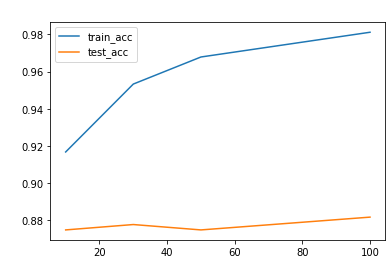

In [ ]:
plt.plot(epoch_list, train_acc,label='train_acc')
plt.plot(epoch_list, test_acc,label='test_acc')
plt.title("Accuracy comparison on each epoch",color="white")
plt.xlabel("Epochs",color="white")
plt.ylabel("Accuracy",color="white")
plt.legend(loc="upper left")
plt.show()

**Comments :** The model is overfitting with the number of epochs increase. 

# Confusion matrix for result up to 10 epochs

In [ ]:
nb_epochs = 10

epoch_list=[10,30,50,100]
train_acc=list()
test_acc=list()

for epoch in range(nb_epochs):
  losses = list()
  model.train()
  accuracies = list()
  for batch in train_loader:
    x,y = batch
    b = x.size(0)
    x = x.view(b,-1).cuda()
    
    # Forward propagation
    logit = model(x)

    # Computing Loss
    J = loss(logit,y.cuda())

    # Cleaning the gradient
    model.zero_grad()
    
    # Accumulating the partial derivatives of J wrt params
    J.backward()
    
    # Step in the opposite direction of the gradient
    optimizer.step()

    losses.append(J.item())
    accuracies.append(y.eq(logit.detach().argmax(dim=1).cpu()).float().mean())

  print(f'Epoch {epoch+1}',end=', ' )
  print(f'train loss: {torch.tensor(losses).mean():.2f}',end=', ')
  print(f'train accuracy: {torch.tensor(accuracies).mean():.2f}')


  if epoch+1 in epoch_list : 
    acc = torch.tensor(accuracies).mean()
    train_acc.append(acc.numpy())
  
  # Evaluation

  losses = list()
  accuracies = list()
  model.eval()
  for batch in test_loader:
    x,y = batch
    b = x.size(0)
    x = x.view(b,-1).cuda()
    
    # Forward prop to calculate loss
    with torch.no_grad():
      logit = model(x)
    
    # Computing Loss
    J = loss(logit,y.cuda())

    losses.append(J.item())
    accuracies.append(y.eq(logit.detach().argmax(dim=1).cpu()).float().mean())
  print(f'Epoch {epoch+1}',end=', ' )
  print(f'test loss: {torch.tensor(losses).mean():.2f}',end=', ')
  print(f'test accuracy: {torch.tensor(accuracies).mean():.2f}')

  if epoch+1 in epoch_list : 
    acc = torch.tensor(accuracies).mean()
    test_acc.append(acc.numpy())

Epoch 1, train loss: 0.50, train accuracy: 0.82
Epoch 1, test loss: 0.43, test accuracy: 0.84
Epoch 2, train loss: 0.37, train accuracy: 0.87
Epoch 2, test loss: 0.39, test accuracy: 0.86
Epoch 3, train loss: 0.33, train accuracy: 0.88
Epoch 3, test loss: 0.36, test accuracy: 0.87
Epoch 4, train loss: 0.30, train accuracy: 0.89
Epoch 4, test loss: 0.35, test accuracy: 0.88
Epoch 5, train loss: 0.28, train accuracy: 0.89
Epoch 5, test loss: 0.35, test accuracy: 0.87
Epoch 6, train loss: 0.27, train accuracy: 0.90
Epoch 6, test loss: 0.35, test accuracy: 0.87
Epoch 7, train loss: 0.25, train accuracy: 0.90
Epoch 7, test loss: 0.36, test accuracy: 0.88
Epoch 8, train loss: 0.24, train accuracy: 0.91
Epoch 8, test loss: 0.37, test accuracy: 0.87
Epoch 9, train loss: 0.23, train accuracy: 0.91
Epoch 9, test loss: 0.37, test accuracy: 0.88
Epoch 10, train loss: 0.22, train accuracy: 0.92
Epoch 10, test loss: 0.43, test accuracy: 0.87


In [ ]:
model.eval()
actual = list()
predicted = list()
for batch in test_loader:
    x,y = batch
    b = x.size(0)
    x = x.view(b,-1).cuda()
    
    # Forward prop to calculate loss
    with torch.no_grad():
      logit = model(x)
    
    preds = logit.detach().argmax(dim=1).cpu()
    for p in preds : predicted.append(p)

    actuals = y
    for a in actuals : actual.append(a)

actual = torch.tensor(actual)
predicted = torch.tensor(predicted)

Text(83.40000000000006, 0.5, 'True Label')

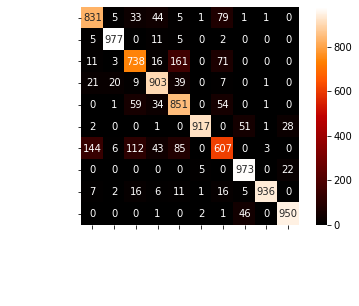

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(actual,predicted)
heat = sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.gist_heat)
class_label=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
heat.set_xticklabels(class_label, rotation=90,color="white")
heat.set_yticklabels(class_label, rotation=0,color="white")
heat.set_xlabel('Predicted Label',color="white")
heat.set_ylabel('True Label',color="white")

In [ ]:
class_acc = list()
for i in range(len(class_label)):
  pred = mat[i,i]
  act = np.sum(mat[i,:])
  class_acc.append(pred/act)
class_acc

[0.831, 0.977, 0.738, 0.903, 0.851, 0.917, 0.607, 0.973, 0.936, 0.95]

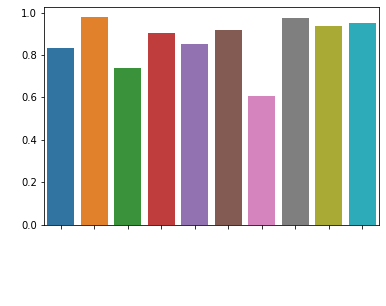

In [ ]:
ax = sns.barplot(x = class_names, y = class_acc)
ax.set_xlabel('Type of Clothing',color="white")
ax.set_ylabel('Accuracy',color="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,color="white");

In [ ]:
mxidx = np.argmax(class_acc)
print(f'Easiest class for the model to classify : {class_label[mxidx]}')

Easiest class for the model to classify : Trouser


In [ ]:
mnidx = np.argmin(class_acc)
print(f'Hardest class for the model to classify : {class_label[mnidx]}')

Hardest class for the model to classify : Shirt
